[0.40824829 0.81649658 0.40824829]
[0.42262001 0.80280264 0.42059512]


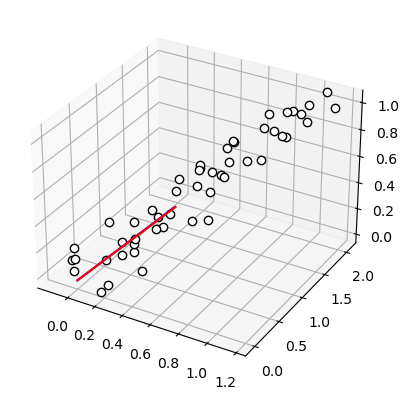

In [12]:
import numpy as np
import matplotlib.pyplot as plt

from scipy.optimize import leastsq # least_squares  (2 funciones similares)

np.random.seed(1)

N = 50

v = np.array([1,2,1])

XYZ = np.zeros((N,3))

XYZ[:,0] = np.linspace(0,1,N) * v[0] + np.random.normal(0, 0.1, N) # ruido gaussiano
XYZ[:,1] = np.linspace(0,1,N) * v[1] + np.random.normal(0, 0.1, N)
XYZ[:,2] = np.linspace(0,1,N) * v[2] + np.random.normal(0, 0.1, N)

fig = plt.figure()

ax = fig.add_subplot(111, projection = '3d')

ax.plot(XYZ[:,0], XYZ[:,1], XYZ[:,2], "wo", mec='k')

def distancia(vector, puntos):

    p = np.copy(puntos)

    p -= np.mean(p, axis = 0) # desplazando la nube de puntos al centro de masa

    vectorial = np.cross(vector, p)
    d = np.zeros(len(vectorial))
    for i in range(len(vectorial)):
        d[i] = np.linalg.norm(vectorial[i])
    
    return d/np.linalg.norm(vector)


vector = leastsq(distancia, x0 = XYZ[-1] - XYZ[0], args=XYZ)
vector = vector[0]

v = v/np.linalg.norm(v)
vector = vector/np.linalg.norm(vector)

print(v)
print(vector)

ax.plot((0,v[0]), (0,v[1]), (0, v[2]), "b-")
ax.plot((0,vector[0]), (0,vector[1]), (0, vector[2]), "r-")
